# Autoencoder その1

## 1. Autoencoder とは

### 1-1. オートエンコーダ概要

オートエンコーダ（自己符号化器、英: autoencoder）とは、ニューラルネットワークを使用した<br>
次元圧縮のためのアルゴリズム。

2006年にジェフリー・ヒントンらが提案した。<br>
線形の次元圧縮としては主成分分析があるが、オートエンコーダはニューラルネットワークを使用する。

オートエンコーダは3層ニューラルネットにおいて、入力層と出力層に同じデータを用いて<br>
教師あり学習させたもの。<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/0/06/AutoEncoder.png">

圧縮していく過程をエンコーダと呼び、復元する過程をデコーダと呼びます。<br>
エンコーダは入力を低次元に表現することができ、デコーダは低次元から復元する能力を持ちます。

オートエンコーダは<b>順伝播型</b>ニューラルネットワーク（feedforward neural network）です。<br>
順伝播型ニューラルネットワークは再帰的ニューラルネットワークのようにループしたり<br>
しないもののことです。

### 1-2. オートエンコーダは大成功だったか

深層学習ライブラリKerasのオートエンコーダのチュートリアル<br>
https://blog.keras.io/building-autoencoders-in-keras.html

によると、今では実用的な用途としてはめったに使われてないと書かれています。<br>
オートエンコーダは画像のノイズ除去や可視化程度でしか利用目的がないとされています。

実は、その後ディープラーニングのアルゴリズムは改良を重ね、事前学習をせずに<br>
ランダム値を採用しても十分な精度が出るようになったからです。

さらに、オートエンコーダの研究は進み、生成モデルで活用され初めて復活しているようです。<br>
ここではここではオートエンコーダのファーストステップについてまとめてみました。

まずは、以下について整理します。

1. Undercomplete Autoencoder
2. Sparse Autoencoder
3. Deep Autoencoder
4. Convolutional Autoencoder

## 2. Undercomplete Autoencoder

エンコードされたデータ（コードと呼ばれる）の次元数を入力の次元数よりも<br>
小さくしてしまうと、単純に値をコピーするだけではうまく入力を再現することができず、<br>
重要な特徴を抽出することが強制されます。

このように、コードの次元が入力の次元よりも小さくなるようなものを<br>
<b>Undercomplete Autoencoder</b>と呼びます。

### 2-1. データ読み込み

In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

DIR_WORK = "./03_autoencoder/"

Using TensorFlow backend.


### 2-2. model 生成

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

入力と出力は784次元で、中間層は32次元になっています。<br>
エンコーダとデコーダで重みを共有する場合がありますが、<br>
ここではそれぞれ別の重みを使用しています。

Modelを使うよりも、Sequentialに慣れている人が多いかと思いますが、<br>
encodedのような変数を後から利用できるように、今回はこのような実装方法で進めていきます。<br>
Sequentialで実装することも可能です。

オプティマイザにはAdadelta、<br>
損失関数にはバイナリエントロピー（binary cross-entropy）を使用しています。<br>
下記のように画像データは0から1の値を取るように規格化していて、<br>
出力も0から1になるように出力層の活性化関数にはシグモイドを適用しています。



### 2-3. フィッティング

In [3]:
autoencoder.fit(x_train, x_train,             
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s - loss: 0.3797 - val_loss: 0.2734
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.2668 - val_loss: 0.2570
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.2469 - val_loss: 0.2340
Epoch 4/50
60000/60000 [==============================] - 6s - loss: 0.2257 - val_loss: 0.2154
Epoch 5/50
60000/60000 [==============================] - 5s - loss: 0.2102 - val_loss: 0.2026
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.1993 - val_loss: 0.1934
Epoch 7/50
60000/60000 [==============================] - 6s - loss: 0.1913 - val_loss: 0.1863
Epoch 8/50
60000/60000 [==============================] - 6s - loss: 0.1846 - val_loss: 0.1803
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.1788 - val_loss: 0.1747
Epoch 10/50
60000/60000 [==============================] - 6s - loss: 0.1737 - val_loss: 0.1698

MNISTのデータを読み込んだ後、配列を変形しています。<br>
x_trainは (60000, 28, 28) という形をしていますが、<br>
784次元の入力になるように (60000, 784) に変形しています。

また、Autoencoderなので、入力画像がラベルとしても使われます。

50エポック計算すると、訓練誤差やテスト誤差は共に0.10程度になります。

In [4]:
autoencoder.save_weights(DIR_WORK + 'autoencoder-1.h5')
autoencoder.load_weights(DIR_WORK + 'autoencoder-1.h5')

### 2-4. 入出力画像の視覚化

次に、入力画像と出力画像を可視化してみます。

上段：オリジナル画像　下段：出力画像

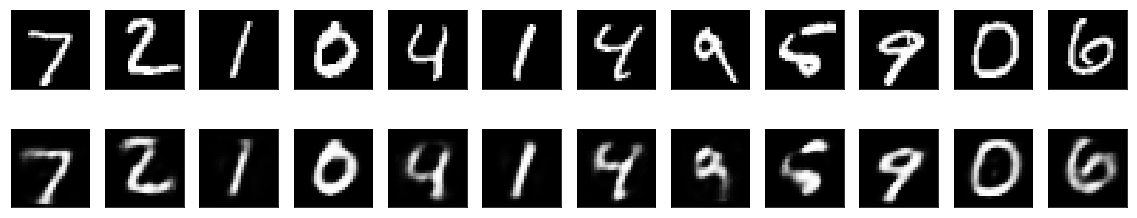

In [5]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

# 何個表示するか
n = 12
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

無事に可視化することができました。オリジナルに近い画像を出力できていることが分かります。


### 2-5. Adam適用の場合

ここまで、オプティマイザはAdadeltaを使用しましたが、最近よく使われるAdamにするとどうなるのか、<br>
以下で確認してみます。

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s - loss: 0.1023 - val_loss: 0.0977
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.0976 - val_loss: 0.0952
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.0959 - val_loss: 0.0941
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.0951 - val_loss: 0.0935
Epoch 5/50
60000/60000 [==============================] - 5s - loss: 0.0946 - val_loss: 0.0931
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.0942 - val_loss: 0.0928
Epoch 7/50
60000/60000 [==============================] - 5s - loss: 0.0940 - val_loss: 0.0927
Epoch 8/50
60000/60000 [==============================] - 5s - loss: 0.0938 - val_loss: 0.0925
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.0937 - val_loss: 0.0924
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.0936 - val_loss: 0.0923

In [8]:
autoencoder.save_weights(DIR_WORK + 'autoencoder-1-2.h5')
autoencoder.load_weights(DIR_WORK + 'autoencoder-1-2.h5')

### 2-6. Adam適用時の入出力画像の視覚化

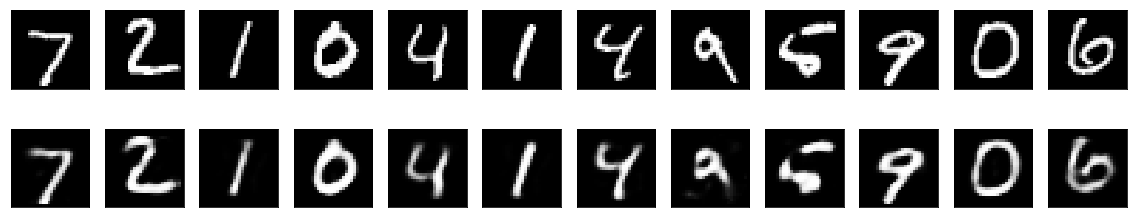

In [9]:
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

# 何個表示するか
n = 12
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Adadeltaの場合と見た目はほとんど変わりませんが、<br>
訓練誤差とテスト誤差の値は少し小さくなって0.092程度になりました。

以下ではAdamを使用していきたいと思います。

## 3. Sparse Autoencoder

### 3-1. Sparse Autoencoder とは

Sparse Autoencoder とは、フィードフォワードニューラルネットワークの学習において<br>
<b>汎化能力を高めるため、正則化項を追加した</b>オートエンコーダのこと。<br>
ただし、ネットワークの重みではなく、中間層の値自体を0に近づける。

入力を $x$、エンコードされたものを $h=f(x)$ とすると（$h$ はコードと呼ばれます）、<br>
Sparse Autoencoderの損失関数は次のように表されます。

$L(x,g(f(x)))+Ω(h)$

ここで、$g$ はデコード、$Ω(h)$ はペナルティを表します。

入力よりもコードの次元が多いOvercomplete Autoencoderでも、<br>
このペナルティの存在により、単純に値をコピーするのではなく、<br>
うまく特徴を学習できるようになります。

このペナルティは重み減衰（weight decay）のような正則化（regularization）と<br>
似ているように見えますが、それとは異なることに注意する必要があります。<br>
<span style="color:red">重み$W$ ではなく、コード$h$ に対する制約</span>になっています。

このペナルティの存在によって、<span style="color:red">中間層で活性化するニューロンがより少なくなり疎に</span>なります。

人間で考えても、ほとんどのニューロンが発火してしまうよりも、<br>
少ないニューロンの発火で再現できる方がエネルギー効率の面でも<br>
良いはずで、メリットがあるでしょう。

### 3−2. model 生成＋フィッティング

In [10]:
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))

# activity regularizerを加える
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-6))(input_img)

# keras.regularizers.l1(0.)
# keras.regularizers.l2(0.)
# keras.regularizers.l1_l2(0.)

decoded = Dense(784, activation='sigmoid')(encoded)

# Undercomplete Autoencoder との比較
#    activity_regularizer が付与されただけ
#encoded = Dense(encoding_dim, activation='relu')(input_img)
#decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=70,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 6s - loss: 0.2977 - val_loss: 0.2125
Epoch 2/70
60000/60000 [==============================] - 5s - loss: 0.1913 - val_loss: 0.1726
Epoch 3/70
60000/60000 [==============================] - 5s - loss: 0.1635 - val_loss: 0.1535
Epoch 4/70
60000/60000 [==============================] - 5s - loss: 0.1489 - val_loss: 0.1423
Epoch 5/70
60000/60000 [==============================] - 5s - loss: 0.1395 - val_loss: 0.1344
Epoch 6/70
60000/60000 [==============================] - 6s - loss: 0.1325 - val_loss: 0.1282
Epoch 7/70
60000/60000 [==============================] - 5s - loss: 0.1271 - val_loss: 0.1234
Epoch 8/70
60000/60000 [==============================] - 5s - loss: 0.1230 - val_loss: 0.1200
Epoch 9/70
60000/60000 [==============================] - 5s - loss: 0.1201 - val_loss: 0.1175
Epoch 10/70
60000/60000 [==============================] - 5s - loss: 0.1180 - val_loss: 0.1157

In [11]:
autoencoder.save_weights(DIR_WORK + 'autoencoder-2.h5')
autoencoder.load_weights(DIR_WORK + 'autoencoder-2.h5')

regularizers.l1() の部分がペナルティ項に対応しています。<br>
これは $Ω(h)=λ∑|h_i|$ に相当します。

### 3-3. 入出力画像の視覚化

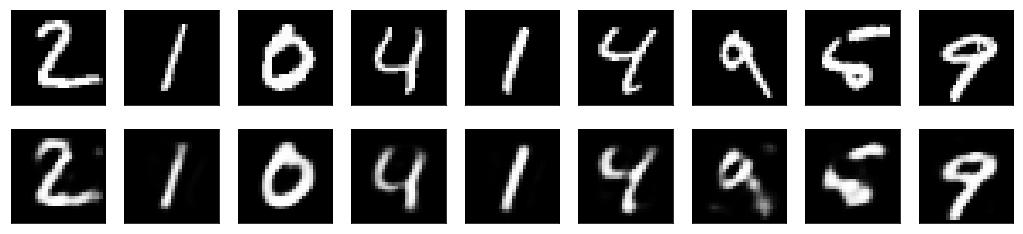

In [12]:
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 3-4. 中間層の平均活性度を確認

出力画像の見た目も、テスト誤差も、どちらもペナルティがない時とほとんど変わらないように見えます。

中間層の平均活性度を見てみましょう。<br>
ペナルティ $Ω(h)$ によって平均活性度が小さくなっていると考えられます。

In [13]:
encoder = Model(inputs=input_img, outputs=encoded)
encoded_imgs = encoder.predict(x_test)

print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 0.856017


という値が得られました。<br>
ペナルティ項がない場合は、8.86という値になります。

ペナルティを加えることにより、<span style="color:red">中間層における平均活性度が小さくなっている</span>ことが分かります。

## 4. Deep Autoencoder

### 4-1. 中間層の考察 

Autoencoderも順伝播型ニューラルネットワークなので、層を増やした場合のメリットを<br>
享受できると考えられます。ここでは中間層の数を増やし、深くすることを考えます。

<b>Universal approximation theorem</b>という定理があり、<br>
順伝播型ニューラルネットワークの場合、中間層が1層以上、かつ<br>
中間層おけるニューロン数が十分大きければ、<br>
基本的にどんな関数でも近似できることが保証されています<br>
（厳密にはもう少し細かい条件がありますが）。

これまで見てきたAutoencoderでエンコーダの部分だけを考えると<br>
中間層が存在していません。そこに一つ以上の中間層を加えることにより、<br>
エンコーダの表現力が増すと考えることができます。

では中間層が1層あれば、どんな関数でも学習できるようになったと考えてよいのでしょうか。<br>
実はそうではありません。十分な表現力があるからといって、「学習」できるかどうかは別問題だからです。

アルゴリズム上の問題でうまく学習できない可能性があります。<br>
そのアルゴリズムでは最適なパラメータになるまで学習を進めることができないかもしれません。<br>
原理的にはかなり近い関数を学習可能だとしても、必要となる中間層のニューロン数が<br>
膨大で計算時間がかかり過ぎてしまう可能性が考えられます。

また、そもそも違う関数に向かって学習が進んでしまう可能性も考えられます。

しかし、様々な研究により、層を増やして深くすることで、計算コストが小さくなったり、<br>
少ないデータで学習できるようになったり、正確度が上がったりする場合があることが示されています。

それでは、深くしたモデルを実際に実装してみましょう。

### 4-2. model 生成＋フィッティング

In [14]:
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s - loss: 0.2424 - val_loss: 0.1622
Epoch 2/100
60000/60000 [==============================] - 9s - loss: 0.1459 - val_loss: 0.1321
Epoch 3/100
60000/60000 [==============================] - 9s - loss: 0.1273 - val_loss: 0.1224
Epoch 4/100
60000/60000 [==============================] - 9s - loss: 0.1190 - val_loss: 0.1141
Epoch 5/100
60000/60000 [==============================] - 9s - loss: 0.1136 - val_loss: 0.1103
Epoch 6/100
60000/60000 [==============================] - 9s - loss: 0.1100 - val_loss: 0.1070
Epoch 7/100
60000/60000 [==============================] - 9s - loss: 0.1070 - val_loss: 0.1041
Epoch 8/100
60000/60000 [==============================] - 9s - loss: 0.1045 - val_loss: 0.1021
Epoch 9/100
60000/60000 [==============================] - 9s - loss: 0.1024 - val_loss: 0.1005
Epoch 10/100
60000/60000 [==============================] - 9s - loss: 0.1007 - val_lo

60000/60000 [==============================] - 9s - loss: 0.0814 - val_loss: 0.0813
Epoch 86/100
60000/60000 [==============================] - 9s - loss: 0.0814 - val_loss: 0.0812
Epoch 87/100
60000/60000 [==============================] - 9s - loss: 0.0813 - val_loss: 0.0814
Epoch 88/100
60000/60000 [==============================] - 9s - loss: 0.0813 - val_loss: 0.0811
Epoch 89/100
60000/60000 [==============================] - 9s - loss: 0.0812 - val_loss: 0.0810
Epoch 90/100
60000/60000 [==============================] - 9s - loss: 0.0812 - val_loss: 0.0811
Epoch 91/100
60000/60000 [==============================] - 9s - loss: 0.0812 - val_loss: 0.0813
Epoch 92/100
60000/60000 [==============================] - 9s - loss: 0.0812 - val_loss: 0.0811
Epoch 93/100
60000/60000 [==============================] - 9s - loss: 0.0811 - val_loss: 0.0812
Epoch 94/100
60000/60000 [==============================] - 9s - loss: 0.0811 - val_loss: 0.0808
Epoch 95/100
60000/60000 [=================

### 4-3. 入出力画像の視覚化

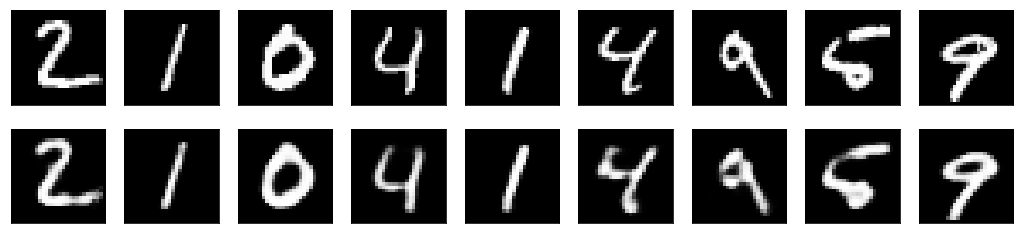

In [15]:
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

# 何個表示するか
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

訓練誤差・テスト誤差は共に約0.083となりました。

中間層が1層の場合は約0.092だったので、誤差が小さくなっていることが分かります。

## 5. Convolutional Autoencoder

→続きは　その２でまとめます。

## 参考文献

Building Autoencoders in Keras<br>
https://blog.keras.io/building-autoencoders-in-keras.html

Kerasで学ぶAutoencoder<br>
https://elix-tech.github.io/ja/2016/07/17/autoencoder.html

オートエンコーダ<br>
https://ja.wikipedia.org/wiki/%E3%82%AA%E3%83%BC%E3%83%88%E3%82%A8%E3%83%B3%E3%82%B3%E3%83%BC%E3%83%80

オートエンコーダ：抽象的な特徴を自己学習するディープラーニングの人気者<br>
https://deepage.net/deep_learning/2016/10/09/deeplearning_autoencoder.html

AutoEncoderで特徴抽出<br>
https://www.slideshare.net/lewuathe/auto-encoder-v2

Chainer で Stacked Auto-Encoder を試してみた<br>
http://wazalabo.com/chainer-stacked-auto-encoder.html

Variational Autoencoder徹底解説<br>
https://qiita.com/kenmatsu4/items/b029d697e9995d93aa24

A visual proof that neural nets can compute any function<br>
http://neuralnetworksanddeeplearning.com/chap4.html